In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
sns.set()

In [2]:
raw_data = pd.read_csv("/Users/mohammadreza/Documents/myFiles/data tutorial/the-data-science-course-complete-data-science-bootcamp(ran-1904-@045).part1/35 - Advanced Statistical Methods - Practical Example Linear Regression/002 1.04.Real-life-example.csv")
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(["Model"],axis = 1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_na = data.dropna(axis=0)

/Users/mohammadreza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

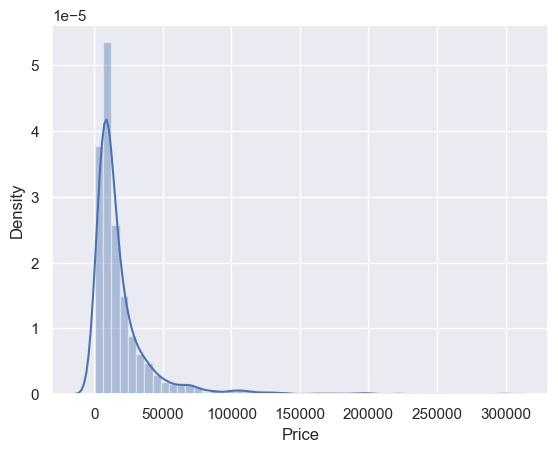

In [7]:
sns.distplot(data_no_na["Price"])

In [8]:
q= data_no_na["Price"].quantile(0.99)
data_1=data_no_na[data_no_na["Price"]<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [9]:
q=data_1["Mileage"].quantile(0.99)
data_2= data_1[data_1["Mileage"]<q]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


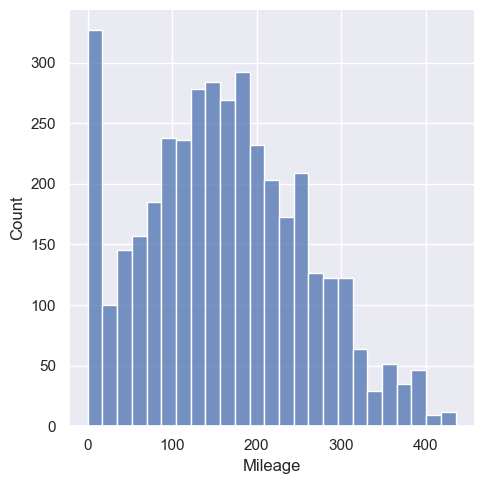

In [10]:
sns.displot(data_2["Mileage"])

In [11]:
q=data_2["Year"].quantile(0.01)
data_3=data_2[data_2["Year"]>q]
data_3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3890,3890.000000,3890,3890.000000,3890.000000,3890,3890,3890.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1479,NaN,NaN,1814,3522,NaN
mean,NaN,18137.939874,NaN,160.753985,2.758735,NaN,NaN,2006.691774
std,NaN,19052.360866,NaN,95.595549,5.013666,NaN,NaN,6.107872
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.250000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21537.500000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


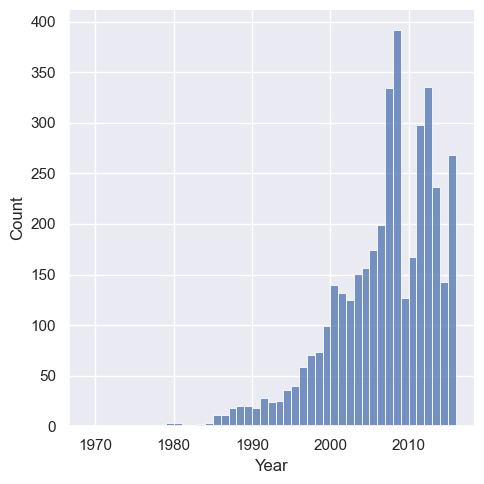

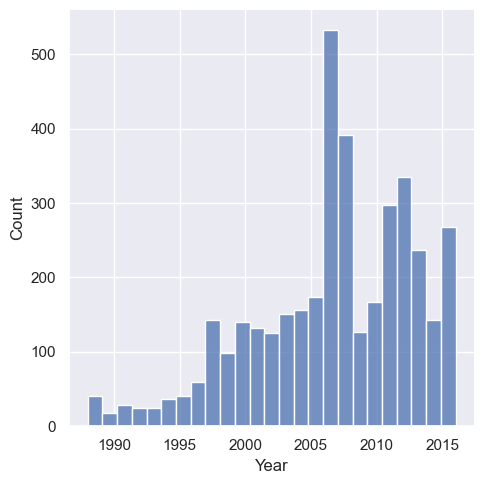

In [12]:
sns.displot(data_2['Year'])
sns.displot(data_3['Year'])

In [13]:
data_4=data_3[data_3["EngineV"]<6.5]

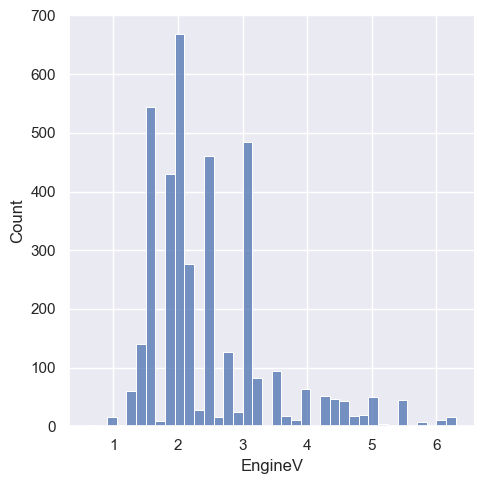

In [14]:
sns.displot(data_4["EngineV"])

In [15]:
data_cleaned= data_4.reset_index(drop=True)

In [16]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [17]:
np.log(data_cleaned["Price"])
data_cleaned["log_price"]=np.log(data_cleaned["Price"])
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


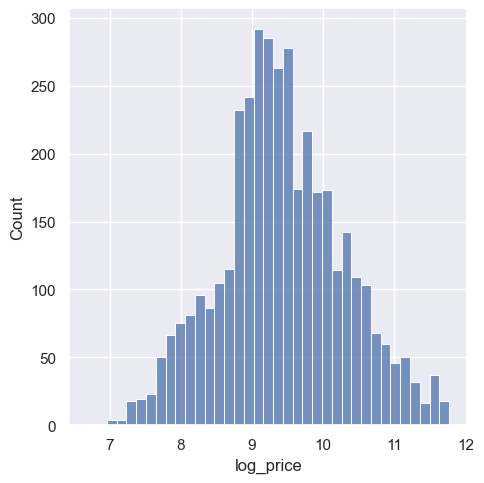

In [18]:
sns.displot(data_cleaned["log_price"])

Text(0.5, 1.0, 'mileage and log price')

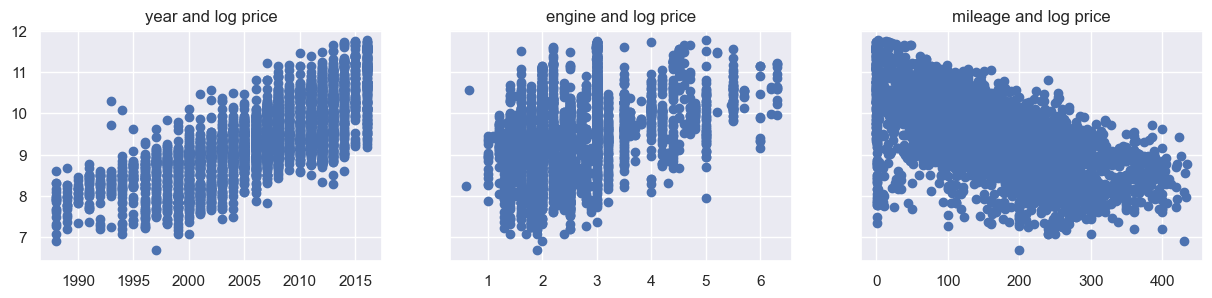

In [19]:
f,(ax1,ax2,ax3)= plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["log_price"])
ax1.set_title("year and log price")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["log_price"])
ax2.set_title("engine and log price")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["log_price"])
ax3.set_title("mileage and log price")

In [20]:
data_cleaned=data_cleaned.drop("Price",axis=1)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = data_cleaned[["Mileage", "Year", "EngineV"]]
vif= pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["features"]= X.columns
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [22]:
data_no_mc = data_cleaned.drop("Year" , axis = 1)
data_no_mc

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [23]:
data_dummies= pd.get_dummies(data_no_mc, drop_first=True)
data_dummies.columns.values


array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [24]:
cols= ['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [25]:
data_preprocessed= data_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [26]:
targets= data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"] , axis = 1) 

In [27]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [28]:
inputs_scaled = scaler.transform(inputs)


In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(inputs, targets , test_size = 0.2 , random_state=100 )

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

(6.0, 13.0)

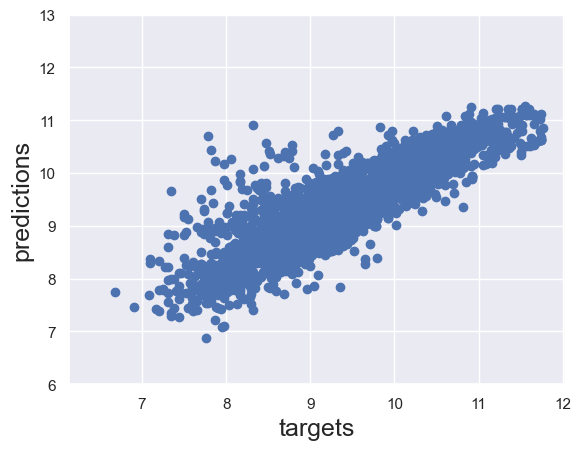

In [31]:
y_hat = reg.predict(x_train)

plt.scatter(y_train , y_hat)
plt.xlabel("targets" , size = 18)
plt.ylabel("predictions", size = 18)

plt.xlim(6.13)
plt.ylim(6,13)

Text(0.5, 1.0, 'residuals')

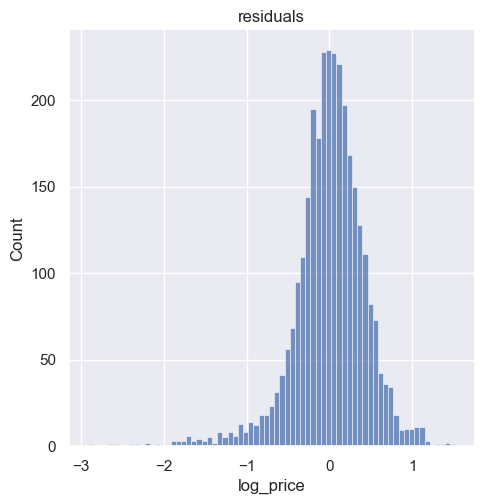

In [32]:
sns.displot(y_train - y_hat)
plt.title("residuals")

In [33]:
reg.score(x_train , y_train)

0.7518053994065869

In [34]:
summary = pd.DataFrame()
summary["features"]= inputs.columns.values
summary["weights"] = reg.coef_
summary

,features,weights
0,Mileage,-0.004795
1,EngineV,0.218505
2,Brand_BMW,0.057540
3,Brand_Mercedes-Benz,0.042672
4,Brand_Mitsubishi,-0.525021
5,Brand_Renault,-0.587782
6,Brand_Toyota,-0.175275
7,Brand_Volkswagen,-0.229158
8,Body_hatch,-0.614404
9,Body_other,-0.328199


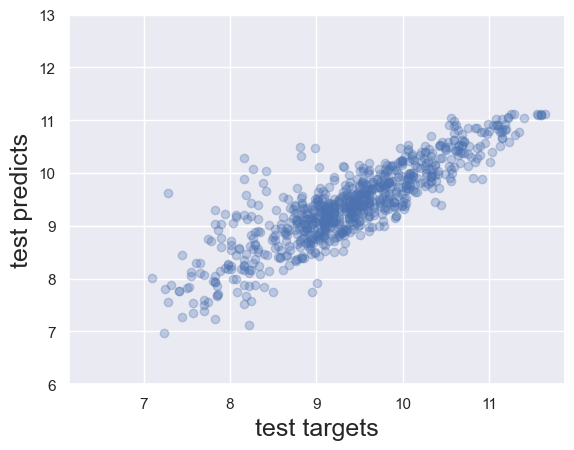

In [35]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test , y_hat_test, alpha = 0.3)
plt.xlabel("test targets", size = 18)
plt.ylabel("test predicts", size = 18)
plt.xlim(6.13)
plt.ylim(6,13)
plt.show()

In [36]:
df_pf = pd.DataFrame()
df_pf["predictions"]= np.exp(y_hat_test)
y_test = y_test.reset_index(drop= True)
df_pf["targets"]= np.exp(y_test)
df_pf["difference"]=  df_pf["targets"]-df_pf["predictions"]
df_pf["difference%"]= np.absolute(df_pf["difference"]/ df_pf["targets"])*100
df_pf


,predictions,targets,difference,difference%
0,6927.046618,10500.0,3572.953382,34.028127
1,7439.991841,7300.0,-139.991841,1.917696
2,20598.271993,9900.0,-10698.271993,108.063353
3,30851.059882,42000.0,11148.940118,26.545096
4,14280.969104,21000.0,6719.030896,31.995385
...,...,...,...,...
769,11935.438261,11500.0,-435.438261,3.786420
770,22130.089353,24999.0,2868.910647,11.476102
771,11381.004449,12300.0,918.995551,7.471509
772,8971.358397,9300.0,328.641603,3.533781


In [37]:
df_pf.describe(include= "all")

,predictions,targets,difference,difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16045.097474,17479.596563,1434.499089,38.381050
std,13003.024551,17344.674070,8248.688949,66.017934
min,1064.809274,1200.000000,-29580.014574,0.068170
25%,7736.654366,7300.000000,-2252.789979,12.489448
50%,11882.820351,11900.000000,274.725561,24.899109
75%,19652.702666,20975.000000,3709.679041,39.432348
max,67647.113315,114999.000000,48029.863336,940.307905


In [38]:
df_pf.sort_values(by= ["difference%"]).tail(20)

,predictions,targets,difference,difference%
759,24551.589483,8400.0,-16151.589483,192.280827
149,12044.297504,4100.0,-7944.297504,193.763354
347,9655.125327,3200.0,-6455.125327,201.722666
196,9902.413558,3200.0,-6702.413558,209.450424
425,8420.087853,2700.0,-5720.087853,211.855106
756,12529.110530,3800.0,-8729.110530,229.713435
728,8429.741566,2500.0,-5929.741566,237.189663
419,15719.132472,4500.0,-11219.132472,249.314055
577,10064.991729,2800.0,-7264.991729,259.463990
412,14437.096233,3600.0,-10837.096233,301.030451


In [39]:
reg.score(x_test,y_test)

0.7468117651022381